In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# Libraries
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt

## Creating the data

In [3]:
path = untar_data(URLs.MNIST); path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
data =ImageDataBunch.from_folder(path, train='training', valid='testing', size=32)

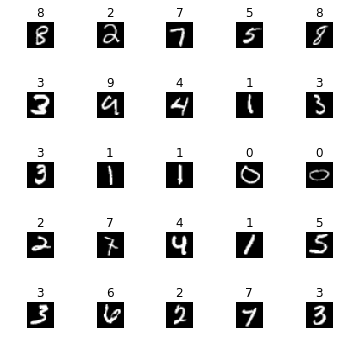

In [5]:
data.show_batch(row=3, figsize=(5, 5))

In [6]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Training the Resnet34

In [7]:
model_34 = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 91644600.30it/s]


In [8]:
model_34.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.410812,0.241741,0.077900,01:29
1,0.175281,0.106919,0.033300,01:26
2,0.146788,0.093076,0.027800,01:25


In [0]:
model_34.save('stage-1-resnet34')

## Interpretation from classifier

In [0]:
intrp = ClassificationInterpretation.from_learner(model_34)

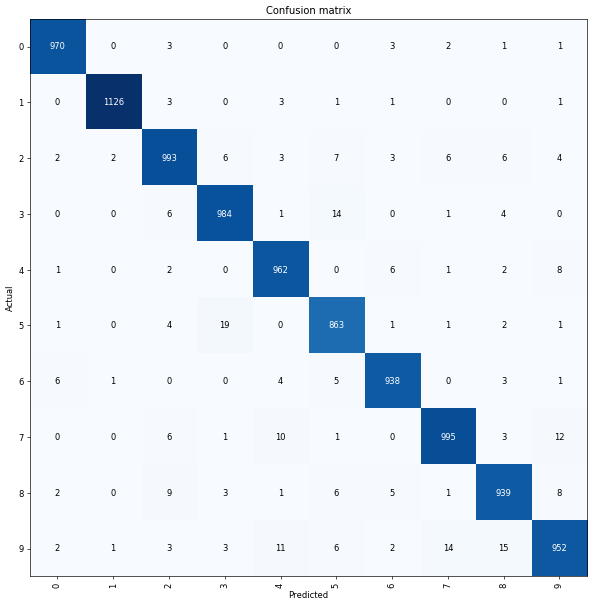

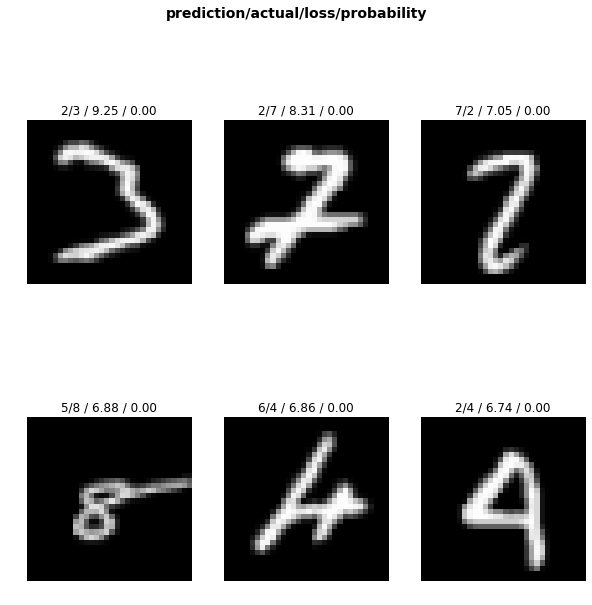

In [11]:
intrp.plot_confusion_matrix(figsize=(10, 10), dpi=60)
intrp.plot_top_losses(6, figsize=(10, 10))

In [12]:
intrp.most_confused(min_val=2)

[('5', '3', 19),
 ('9', '8', 15),
 ('3', '5', 14),
 ('9', '7', 14),
 ('7', '9', 12),
 ('9', '4', 11),
 ('7', '4', 10),
 ('8', '2', 9),
 ('4', '9', 8),
 ('8', '9', 8),
 ('2', '5', 7),
 ('2', '3', 6),
 ('2', '7', 6),
 ('2', '8', 6),
 ('3', '2', 6),
 ('4', '6', 6),
 ('6', '0', 6),
 ('7', '2', 6),
 ('8', '5', 6),
 ('9', '5', 6),
 ('6', '5', 5),
 ('8', '6', 5),
 ('2', '9', 4),
 ('3', '8', 4),
 ('5', '2', 4),
 ('6', '4', 4),
 ('0', '2', 3),
 ('0', '6', 3),
 ('1', '2', 3),
 ('1', '4', 3),
 ('2', '4', 3),
 ('2', '6', 3),
 ('6', '8', 3),
 ('7', '8', 3),
 ('8', '3', 3),
 ('9', '2', 3),
 ('9', '3', 3),
 ('0', '7', 2),
 ('2', '0', 2),
 ('2', '1', 2),
 ('4', '2', 2),
 ('4', '8', 2),
 ('5', '8', 2),
 ('8', '0', 2),
 ('9', '0', 2),
 ('9', '6', 2)]

## Fine tuning

In [13]:
model_34.unfreeze()

model_34.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.091474,0.043845,0.012500,01:37
1,0.022861,0.014117,0.004300,01:37


In [17]:
model_34.load('stage-1-resnet34')

model_34.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


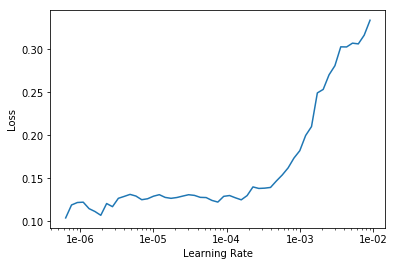

In [18]:
model_34.recorder.plot()

In [19]:
model_34.fit_one_cycle(3, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.081101,0.050899,0.017100,01:37
1,0.051777,0.031235,0.009900,01:37
2,0.024942,0.027369,0.008300,01:38


Cool, now we are getting the error rate 0.08%, which is quite good considering the model that we used aleardy pretrained model, so it could overfit the data. 
 
Let's check.